<a href="https://colab.research.google.com/github/ShubhamKNIT/DeepRazor/blob/Testing-with-github/FAST_SAM_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Clone the FastSAM repository from GitHub
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git

Cloning into 'FastSAM'...
remote: Enumerating objects: 1329, done.
remote: Counting objects: 100% (401/401), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 1329 (delta 346), reused 308 (delta 308), pack-reused 928 (from 1)
Receiving objects: 100% (1329/1329), 72.56 MiB | 26.65 MiB/s, done.
Resolving deltas: 100% (542/542), done.


In [ ]:
# Download the pre-trained FastSAM model weights from Hugging Face
!wget https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt

--2024-12-22 04:31:52--  https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
Resolving huggingface.co (huggingface.co)... 3.171.171.6, 3.171.171.104, 3.171.171.65, ...
Connecting to huggingface.co (huggingface.co)|3.171.171.6|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.hf.co/repos/71/c3/71c3ec5a83f3fc374665cec9240f614262e29088fca1a18732571e13c7084f1b/c0be4e7ddbe4c15333d15a859c676d053c486d0a746a3be6a7a9790d52a9b6d7?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27FastSAM.pt%3B+filename%3D%22FastSAM.pt%22%3B&Expires=1735101112&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTczNTEwMTExMn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy83MS9jMy83MWMzZWM1YTgzZjNmYzM3NDY2NWNlYzkyNDBmNjE0MjYyZTI5MDg4ZmNhMWExODczMjU3MWUxM2M3MDg0ZjFiL2MwYmU0ZTdkZGJlNGMxNTMzM2QxNWE4NTljNjc2ZDA1M2M0ODZkMGE3NDZhM2JlNmE3YTk3OTBkNTJhOWI2ZDc%7EcmVzcG9uc2UtY29udGVudC1kaXNwb3NpdGlvbj0

In [ ]:
# Install the dependencies required by FastSAM from the requirements.txt file
!pip install -r FastSAM/requirements.txt

# Install the OpenAI CLIP library directly from its GitHub repository
!pip install git+https://github.com/openai/CLIP.git

INFO: pip is looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of mdit-py-plugins to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 

In [ ]:
# Download a sample image of a dog from the Segment Anything GitHub repository
!wget -P images https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg

--2024-12-22 04:32:11--  https://raw.githubusercontent.com/facebookresearch/segment-anything/main/notebooks/images/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99846 (98K) [image/jpeg]
Saving to: ‘images/dog.jpg’

dog.jpg             100%[===================>]  97.51K  --.-KB/s    in 0.02s   

2024-12-22 04:32:11 (4.11 MB/s) - ‘images/dog.jpg’ saved [99846/99846]



In [ ]:
# Import necessary libraries for image processing and visualization
import matplotlib.pyplot as plt
import cv2

In [ ]:
image = cv2.imread('images/dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

534 800


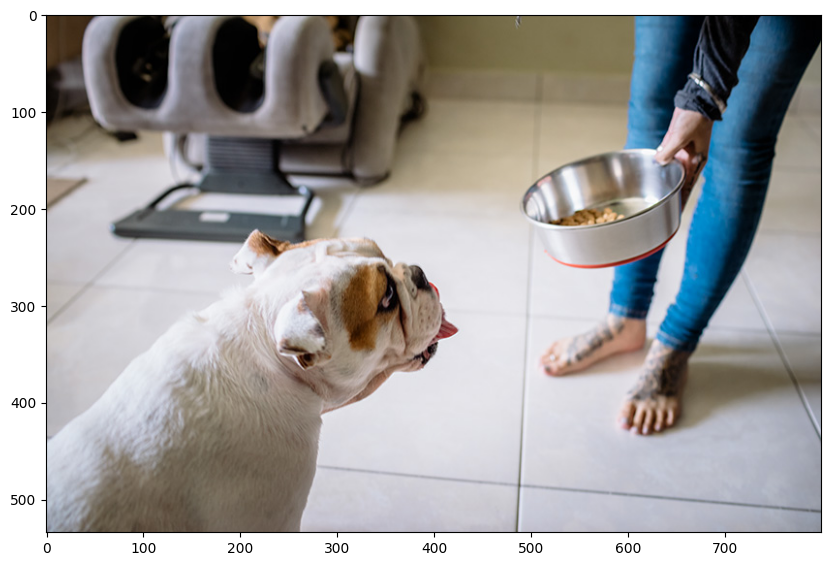

In [ ]:
original_h = image.shape[0]
original_w = image.shape[1]
print(original_h, original_w)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

### Run the FastSAM inference script to segment the image
### Parameters:
### --model_path: Path to the pre-trained model weights
### --img_path: Path to the input image
### --imgsz: Resize the image to 1024 pixels (maintaining aspect ratio)

In [ ]:
!python FastSAM/Inference.py --model_path FastSAM.pt --img_path ./images/dog.jpg --imgsz 1024
# !python FastSAM/Inference.py --model_path FastSAM.pt --img_path ./images/dog.jpg --output_path ./labels --save_masks


/content/FastSAM/ultralytics/nn/tasks.py:518: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load
2024-12-22 04:33:32.685

534 800


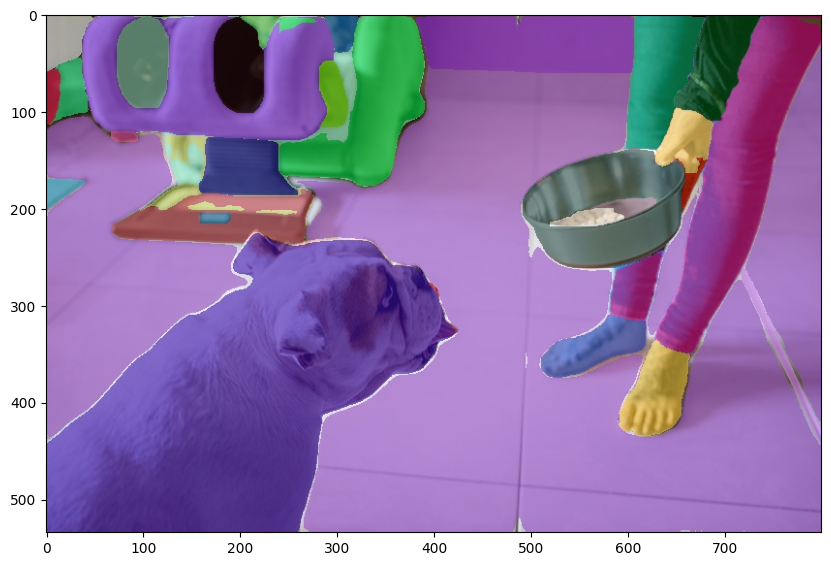

In [ ]:
#output image
image = cv2.imread('output/dog.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_h, original_w)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

In [ ]:
!pip list | grep torch

torch                              2.5.1+cu121
torchaudio                         2.5.1+cu121
torchsummary                       1.5.1
torchvision                        0.20.1+cu121


In [ ]:
!python FastSAM/Inference.py --model_path FastSAM.pt --img_path /content/interstellar.jpg --imgsz 1024

/content/FastSAM/ultralytics/nn/tasks.py:518: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load
2024-12-22 04:40:35.019

380 612


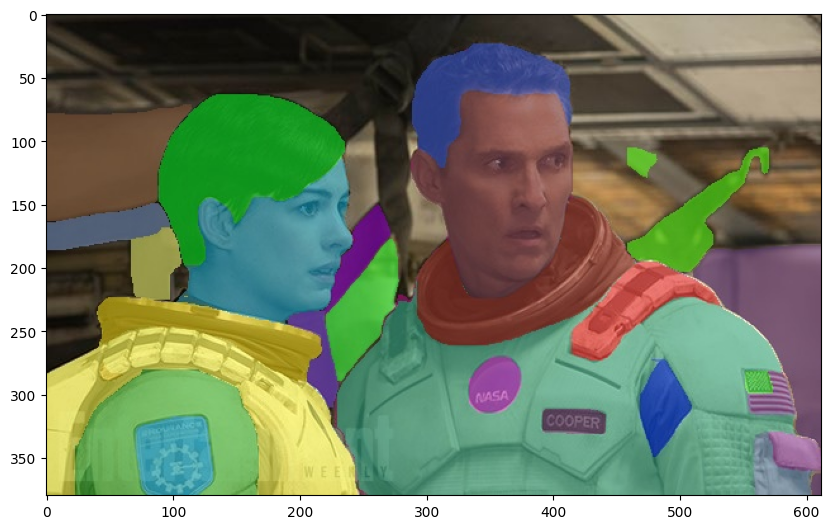

In [ ]:
#output image
image2 = cv2.imread('output/interstellar.jpg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
original_h = image2.shape[0]
original_w = image2.shape[1]
print(original_h, original_w)
plt.figure(figsize=(10,10))
plt.imshow(image2)
plt.show()

# The fuunction for analyzing the whole image

Output image dimensions: Height=380, Width=612


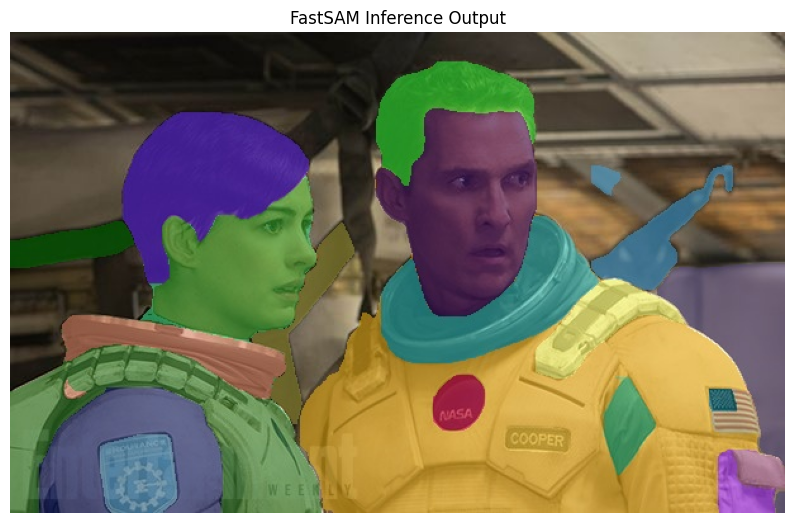

In [ ]:
import subprocess
import cv2
import matplotlib.pyplot as plt

def run_fastsam_inference(image_path, model_path="FastSAM.pt", output_dir="output", imgsz=1024, conf=0.5, iou=0.6, retina=True):
    """
    Runs the FastSAM inference with customizable arguments to minimize masks.

    Parameters:
        image_path (str): Path to the input image.
        model_path (str): Path to the FastSAM model file.
        output_dir (str): Directory where the output image is saved.
        imgsz (int): Image size to be used during inference.
        conf (float): Confidence threshold for detections (higher values reduce masks).
        iou (float): IoU threshold for detections (higher values reduce overlap).
        retina_masks (bool): Use RetinaNet-style masks for accuracy.

    Returns:
        None
    """
    # Ensure the output image file name matches the input image file name
    image_name = image_path.split("/")[-1]  # Extract file name from path
    output_image_path = f"{output_dir}/{image_name}"

    # Construct the command with additional arguments
    command = [
        "python", "FastSAM/Inference.py",
        "--model_path", model_path,
        "--img_path", image_path,
        "--imgsz", str(imgsz),
        "--conf", str(conf),
        "--iou", str(iou),
        "--retina", str(retina)
    ]

    # Run FastSAM inference using subprocess
    try:
        subprocess.run(command, check=True)
    except subprocess.CalledProcessError as e:
        print(f"Error during FastSAM inference: {e}")
        return

    # Load the output image
    try:
        image = cv2.imread(output_image_path)
        if image is None:
            raise FileNotFoundError(f"Output image not found at {output_image_path}")

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        original_h, original_w = image.shape[:2]
        print(f"Output image dimensions: Height={original_h}, Width={original_w}")

        # Display the output image
        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.title("FastSAM Inference Output")
        plt.axis("off")
        plt.show()

    except Exception as e:
        print(f"Error loading or displaying the output image: {e}")

# Example usage
run_fastsam_inference(
    image_path="/content/interstellar.jpg",
)


In [ ]:
!pip install ultralytics
from ultralytics import FastSAM

# Define an inference source
source = "/content/interstellar.jpg"

# Create a FastSAM model
model = FastSAM("FastSAM-s.pt")  # or FastSAM-x.pt

# Run inference on an image
everything_results = model(source, device="cpu", retina_masks=True, imgsz=1024, conf=0.4, iou=0.9)

# Run inference with bboxes prompt
results = model(source, bboxes=[439, 437, 524, 709])

# Run inference with points prompt
results = model(source, points=[[200, 200]], labels=[1])

# Run inference with texts prompt
results = model(source, texts="a lady")

# Run inference with bboxes and points and texts prompt at the same time
results = model(source, bboxes=[439, 437, 524, 709], points=[[200, 200]], labels=[1], texts="a lady")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 902.2/902.2 kB 15.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 22.7M/22.7M [00:00<00:00, 156MB/s]



image 1/1 /content/interstellar.jpg: 640x1024 28 objects, 1471.5ms
Speed: 25.3ms preprocess, 1471.5ms inference, 113.5ms postprocess per image at shape (1, 3, 640, 1024)

image 1/1 /content/interstellar.jpg: 416x640 1 object, 546.5ms
Speed: 2.4ms preprocess, 546.5ms inference, 373.9ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /content/interstellar.jpg: 416x640 2 objects, 758.9ms
Speed: 3.4ms preprocess, 758.9ms inference, 319.8ms postprocess per image at shape (1, 3, 416, 640)



100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 73.3MiB/s]


image 1/1 /content/interstellar.jpg: 416x640 1 object, 758.6ms
Speed: 3.5ms preprocess, 758.6ms inference, 18199.8ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /content/interstellar.jpg: 416x640 4 objects, 496.9ms
Speed: 2.6ms preprocess, 496.9ms inference, 6932.1ms postprocess per image at shape (1, 3, 416, 640)


In [ ]:
# Load the model and image
model = FastSAM("FastSAM.pt")
results = model("/content/interstellar.jpg", device="cpu", retina_masks=True, imgsz=1024, conf=0.4, iou=0.9)

# Access the masks
masks = results[0].masks.data

# Print the shape of the masks tensor
print(masks.shape)  # Output: torch.Size([number_of_masks, image_height, image_width])


image 1/1 /content/interstellar.jpg: 640x1024 28 objects, 9354.4ms
Speed: 6.6ms preprocess, 9354.4ms inference, 108.1ms postprocess per image at shape (1, 3, 640, 1024)
torch.Size([28, 380, 612])


# Now we try to analze a segment of an image using bbox option

### Draw Box

In [ ]:
!pip -q install roboflow supervision jupyter_bbox_widget

In [ ]:
!pip install supervision
import supervision as sv

In [ ]:
# Function to run FastSAM inference using os.system()
def run_inference(image_path, box_prompt, conf=0.5, iou=0.6, imgsz=1024, model_path='FastSAM.pt'):
    # Build the command string
    command = f'!python FastSAM/Inference.py --model_path {model_path} --img_path {image_path} --imgsz {imgsz} --box_prompt "{box_prompt}" --conf {conf} --iou {iou}'

    # Execute the command
    os.system(command)

    print(f"Ran inference with command: {command}")

In [ ]:
# helper function that loads an image before adding it to the widget

def encode_image(filepath):
    with open(filepath, 'rb') as f:
        image_bytes = f.read()
    encoded = str(base64.b64encode(image_bytes), 'utf-8')
    return "data:image/jpg;base64,"+encoded

In [ ]:
image_path = '/content/ben.jpg'

**NOTE:** Execute cell below and use your mouse to draw bounding box on the image 👇

In [ ]:
import base64
IS_COLAB = True

if IS_COLAB:
    from google.colab import output
    output.enable_custom_widget_manager()

from jupyter_bbox_widget import BBoxWidget

widget = BBoxWidget()
widget.image = encode_image(image_path)
widget

BBoxWidget(colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#b…

In [ ]:
widget.bboxes

[{'x': 140, 'y': -1, 'width': 95, 'height': 317, 'label': ''}]

### Generate mask with FastSAM

In [ ]:
# default_box is going to be used if you will not draw any box on image above
default_box = {'x': 68, 'y': 247, 'width': 555, 'height': 678, 'label': ''}

box = widget.bboxes[0] if widget.bboxes else default_box
box = [
    box['x'],
    box['y'],
    box['x'] + box['width'],
    box['y'] + box['height']
]
print(box)
# Create the desired string format "[ [x, y, x2, y2] ]"
box_prompt = f"[[{','.join(map(str, box))}]]"
print(box_prompt)


[140, -1, 235, 316]
[[140,-1,235,316]]


In [ ]:
# idk why this code is not genrating the output file
# i was trying to modularize the code here

run_inference(image_path, box_prompt)
output_image_path = 'output/' + os.path.basename(image_path)  # Assuming output is saved in 'output' folder

# Debug: Check if file exists
if not os.path.exists(output_image_path):
    print(f"Error: Output file not found at {output_image_path}")
else:
    # Load and process the output image
    image = cv2.imread(output_image_path)
    if image is None:
        print("Error: Failed to load the output image.")
    else:
        # Convert color and display
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        original_h, original_w = image.shape[:2]
        print(f"Output image dimensions: {original_w}x{original_h}")

        plt.figure(figsize=(10, 10))
        plt.imshow(image)
        plt.show()

Ran inference with command: !python FastSAM/Inference.py --model_path FastSAM.pt --img_path /content/ben.jpg --imgsz 1024 --box_prompt "[[140,-1,235,316]]" --conf 0.5 --iou 0.6
Error: Output file not found at output/ben.jpg


In [ ]:
!python FastSAM/Inference.py --model_path FastSAM.pt --img_path /content/ben.jpg --imgsz 1024 --box_prompt "{box_prompt}"

/content/FastSAM/ultralytics/nn/tasks.py:518: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load
2024-12-22 07:54:16.102

330 248


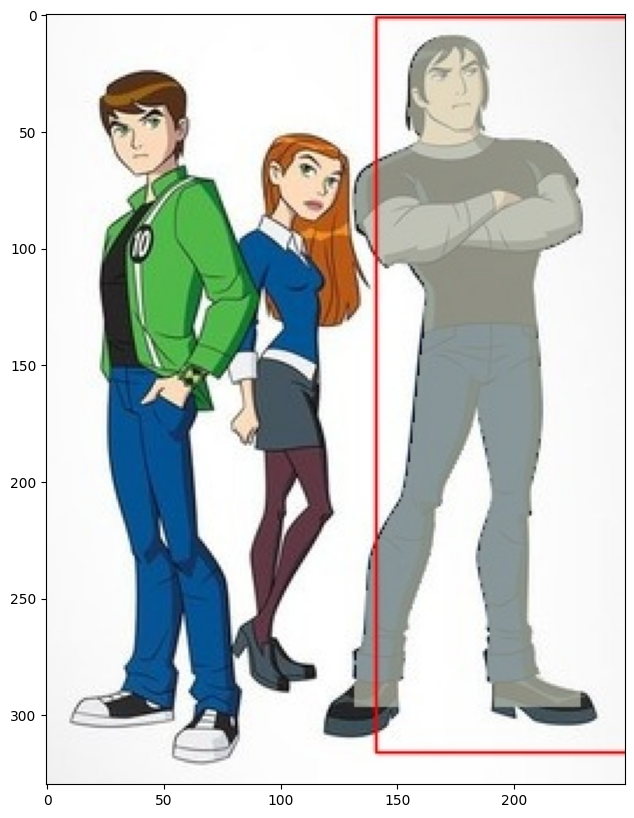

In [ ]:
#output image
image = cv2.imread('output/ben.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
original_h = image.shape[0]
original_w = image.shape[1]
print(original_h, original_w)
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()

# Difference between SAM and FAST-SAM

In [ ]:
# install SAM
!pip -q install git+https://github.com/facebookresearch/segment-anything.git

  Preparing metadata (setup.py) ... done


In [ ]:
# install FastSAM
!git clone https://github.com/CASIA-IVA-Lab/FastSAM.git
!pip -q install -r FastSAM/requirements.txt

Cloning into 'FastSAM'...
remote: Enumerating objects: 1329, done.
remote: Counting objects: 100% (401/401), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 1329 (delta 346), reused 307 (delta 307), pack-reused 928 (from 1)
Receiving objects: 100% (1329/1329), 72.56 MiB | 16.06 MiB/s, done.
Resolving deltas: 100% (542/542), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.0 MB/s eta 0:00:00


In [ ]:
# install other dependencies
!pip -q install roboflow supervision jupyter_bbox_widget

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.7/213.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 727.4/727.4 kB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.8 MB/s eta 0:00:00


In [ ]:
# Download the pre-trained FastSAM model weights from Hugging Face
!wget -P /content/weights -q https://huggingface.co/spaces/An-619/FastSAM/resolve/main/weights/FastSAM.pt
#download SAM weights (pre-trained)
!wget -P /content/weights -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

In [ ]:
FAST_SAM_CHECKPOINT_PATH = "/content/weights/FastSAM.pt"
SAM_SAM_CHECKPOINT_PATH = "/content/weights/sam_vit_h_4b8939.pth"

In [ ]:
%cd /content/FastSAM

import os
import cv2
import torch
import roboflow
import base64

import supervision as sv
import numpy as np

from roboflow import Roboflow
from fastsam import FastSAM, FastSAMPrompt
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

/content/FastSAM


In [ ]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f"DEVICE = {DEVICE}")
fast_sam = FastSAM(FAST_SAM_CHECKPOINT_PATH)

DEVICE = cuda:0


In [ ]:
IMAGE_PATH = "/content/interstellar2.png"

**NOTE:** `prompt_process.everything_prompt` returns `torch.Tensor` when DEVICE = 'cuda:0'. `prompt_process.everything_prompt` returns `numpy.ndarray` when DEVICE = 'cpu'.

In [ ]:
# Convert masks to boolean (True/False)
def masks_to_bool(masks):
    """Parameters:
    - masks (np.ndarray or torch.Tensor): The mask array or tensor to be converted.

    Returns:
    - np.ndarray: A boolean numpy array representing the mask.
    """
    if type(masks) == np.ndarray:
        return masks.astype(bool)
    return masks.cpu().numpy().astype(bool)

In [ ]:
def annotate_image(image_path: str, masks: np.ndarray) -> np.ndarray:
    """
    Annotates an image with given masks.

    Parameters:
    - image_path (str): The file path to the image to be annotated.
    - masks (np.ndarray): A boolean NumPy array representing the masks to apply on the image.

    Returns:
    - np.ndarray: The annotated image as a NumPy array.
    """
    image = cv2.imread(image_path)

    xyxy = sv.mask_to_xyxy(masks=masks)
    detections = sv.Detections(xyxy=xyxy, mask=masks)

    mask_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)
    return mask_annotator.annotate(scene=image.copy(), detections=detections)

In [ ]:
results = fast_sam(
    source=IMAGE_PATH,
    device=DEVICE,
    retina_masks=True,
    imgsz=1024,
    conf=0.5,
    iou=0.6)
prompt_process = FastSAMPrompt(IMAGE_PATH, results, device=DEVICE)
masks = prompt_process.everything_prompt()
# Adding the .jpg extension to the output path
prompt_process.plot(annotations=masks, output_path=f"/content/output/interstellar2.jpg")


image 1/1 /content/interstellar2.png: 576x1024 130 objects, 93.3ms
Speed: 4.3ms preprocess, 93.3ms inference, 36.2ms postprocess per image at shape (1, 3, 1024, 1024)


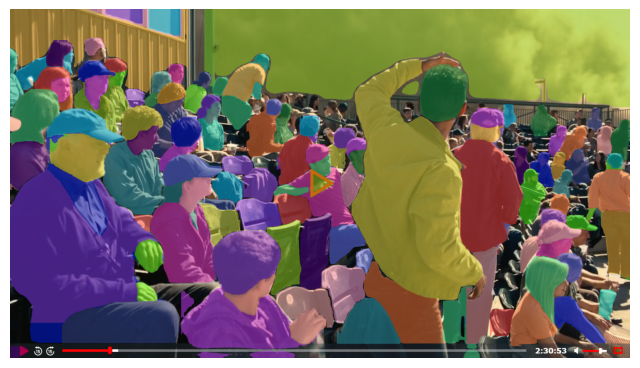

In [ ]:
masks = masks_to_bool(masks)
annotated_image=annotate_image(image_path=IMAGE_PATH, masks=masks)
sv.plot_image(image=annotated_image, size=(8, 8))

In [ ]:
#loading SAM here
MODEL_TYPE = "vit_h"

sam = sam_model_registry[MODEL_TYPE](checkpoint=SAM_SAM_CHECKPOINT_PATH).to(device=DEVICE)
mask_generator = SamAutomaticMaskGenerator(sam)

SAM Inference

In [ ]:
image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)
sam_detections = sv.Detections.from_sam(sam_result=sam_result)

FAST_SAM Inference

In [ ]:
results = fast_sam(
    source=IMAGE_PATH,
    device=DEVICE,
    retina_masks=True,
    imgsz=1024,
    conf=0.5,
    iou=0.6)
prompt_process = FastSAMPrompt(IMAGE_PATH, results, device=DEVICE)
masks = prompt_process.everything_prompt()
masks = masks_to_bool(masks)
xyxy = sv.mask_to_xyxy(masks=masks)
fast_sam_detections = sv.Detections(xyxy=xyxy, mask=masks)


image 1/1 /content/interstellar2.png: 576x1024 130 objects, 98.5ms
Speed: 12.4ms preprocess, 98.5ms inference, 36.7ms postprocess per image at shape (1, 3, 1024, 1024)


### FastSAM vs. SAM

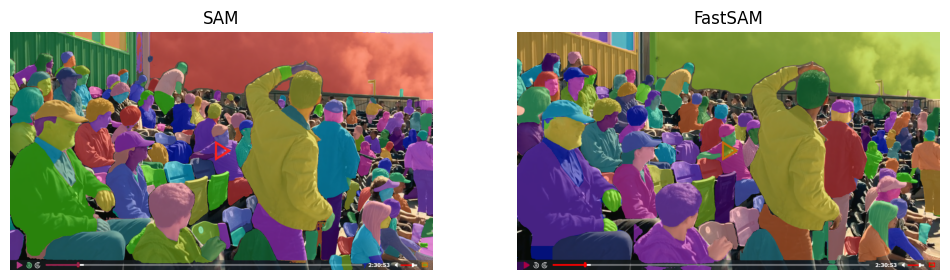

In [ ]:
mask_annotator = sv.MaskAnnotator(color_lookup = sv.ColorLookup.INDEX)

sam_result = mask_annotator.annotate(scene=image_bgr.copy(), detections=sam_detections)
fast_sam_result = mask_annotator.annotate(scene=image_bgr.copy(), detections=fast_sam_detections)

sv.plot_images_grid(
    images=[sam_result, fast_sam_result],
    grid_size=(1, 2),
    titles=['SAM', 'FastSAM']
)

In [ ]:
#this is the number of segments detected by SAM and FAST-SAM in their inference
len(sam_detections.mask), len(fast_sam_detections.mask)

(226, 130)